# Mini Project
## IA 340-2
#### Andre Danos

##### Preface Code

In [1]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("s3://ia-340-2-fall25147258/HTLN_WhiteTailedDeer_SamplingEvents.csv")
df.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
Matplotlib is building the font cache; this may take a moment.
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:298: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


,EventID,PeriodID,ParkCode,Route,SurveyNumber,Round,DeerDate,StartTime,BeginningTemperatureInCelsius,BeginningHumidityInPercent,...,EndingPrecipitation,MoonIlluminationInPercent,DeerTotal,BeginningCloudCoverInPercent,EndingCloudCoverInPercent,FieldNotes,Type,BasisofRecord,ScientificName,TaxonRank
0,ARPODeerSV2005Mar281923,ARPODeerSV2005Mar28,ARPO,Tour Road,1,A,2005-03-28,19:23:00,15.3,60.9,...,No rain,94,22,None present,None present,NaN,Event,HumanObservation,Odocoileus virginianus,Species
1,ARPODeerSV2005Mar282023,ARPODeerSV2005Mar28,ARPO,Tour Road,1,B,2005-03-28,20:23:00,13.6,73.6,...,No rain,94,19,None present,None present,NaN,Event,HumanObservation,Odocoileus virginianus,Species
2,ARPODeerSV2005Mar282123,ARPODeerSV2005Mar28,ARPO,Tour Road,1,C,2005-03-28,21:23:00,13.1,74.5,...,No rain,94,31,None present,None present,NaN,Event,HumanObservation,Odocoileus virginianus,Species
3,ARPODeerSV2005Mar291030,ARPODeerSV2005Mar28,ARPO,Tour Road,2,DayA,2005-03-29,10:30:00,19.0,53.7,...,No rain,0,7,5 - 25,5 - 25,NaN,Event,HumanObservation,Odocoileus virginianus,Species
4,ARPODeerSV2005Mar291130,ARPODeerSV2005Mar28,ARPO,Tour Road,2,DayB,2005-03-29,11:30:00,20.7,49.0,...,No rain,0,0,5 - 25,5 - 25,No deer,Event,HumanObservation,Odocoileus virginianus,Species


In [3]:
df.shape

(677, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   EventID                          677 non-null    object 
 1   PeriodID                         677 non-null    object 
 2   ParkCode                         677 non-null    object 
 3   Route                            677 non-null    object 
 4   SurveyNumber                     677 non-null    int64  
 5   Round                            677 non-null    object 
 6   DeerDate                         677 non-null    object 
 7   StartTime                        677 non-null    object 
 8   BeginningTemperatureInCelsius    677 non-null    float64
 9   BeginningHumidityInPercent       677 non-null    float64
 10  BeginningWindInMetersPerSecond   677 non-null    float64
 11  BeginningWindDirectionInDegrees  677 non-null    int64  
 12  BeginningPrecipitation

In [5]:
df.isnull().sum()

EventID                              0
PeriodID                             0
ParkCode                             0
Route                                0
SurveyNumber                         0
Round                                0
DeerDate                             0
StartTime                            0
BeginningTemperatureInCelsius        0
BeginningHumidityInPercent           0
BeginningWindInMetersPerSecond       0
BeginningWindDirectionInDegrees      0
BeginningPrecipitation               0
EndTime                              0
EndingTemperatureInCelsius           0
EndingHumidityInPercent              0
EndingWindInMetersPerSecond          0
EndingWindDirectionInDegrees         0
EndingPrecipitation                  0
MoonIlluminationInPercent            0
DeerTotal                            0
BeginningCloudCoverInPercent         0
EndingCloudCoverInPercent            0
FieldNotes                         624
Type                                 0
BasisofRecord            

In [6]:
df = df.drop(columns=["FieldNotes", "BeginningWindInMetersPerSecond", "EndingWindInMetersPerSecond", "BeginningWindDirectionInDegrees", "EndingWindDirectionInDegrees", "BeginningHumidityInPercent", "EndingHumidityInPercent","Route","Type","BasisofRecord","ScientificName","TaxonRank","BeginningCloudCoverInPercent","EndingCloudCoverInPercent"], errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   EventID                        677 non-null    object 
 1   PeriodID                       677 non-null    object 
 2   ParkCode                       677 non-null    object 
 3   SurveyNumber                   677 non-null    int64  
 4   Round                          677 non-null    object 
 5   DeerDate                       677 non-null    object 
 6   StartTime                      677 non-null    object 
 7   BeginningTemperatureInCelsius  677 non-null    float64
 8   BeginningPrecipitation         677 non-null    object 
 9   EndTime                        677 non-null    object 
 10  EndingTemperatureInCelsius     677 non-null    float64
 11  EndingPrecipitation            677 non-null    object 
 12  MoonIlluminationInPercent      677 non-null    int

In [17]:
# New Variables
monthly_avg = (
    df.groupby(['ParkCode', 'Year', 'Month'], as_index=False)['DeerTotal']
    .mean()
)

annual_avg = (
    monthly_avg.groupby(['ParkCode', 'Year'], as_index=False)['DeerTotal']
    .mean()
)


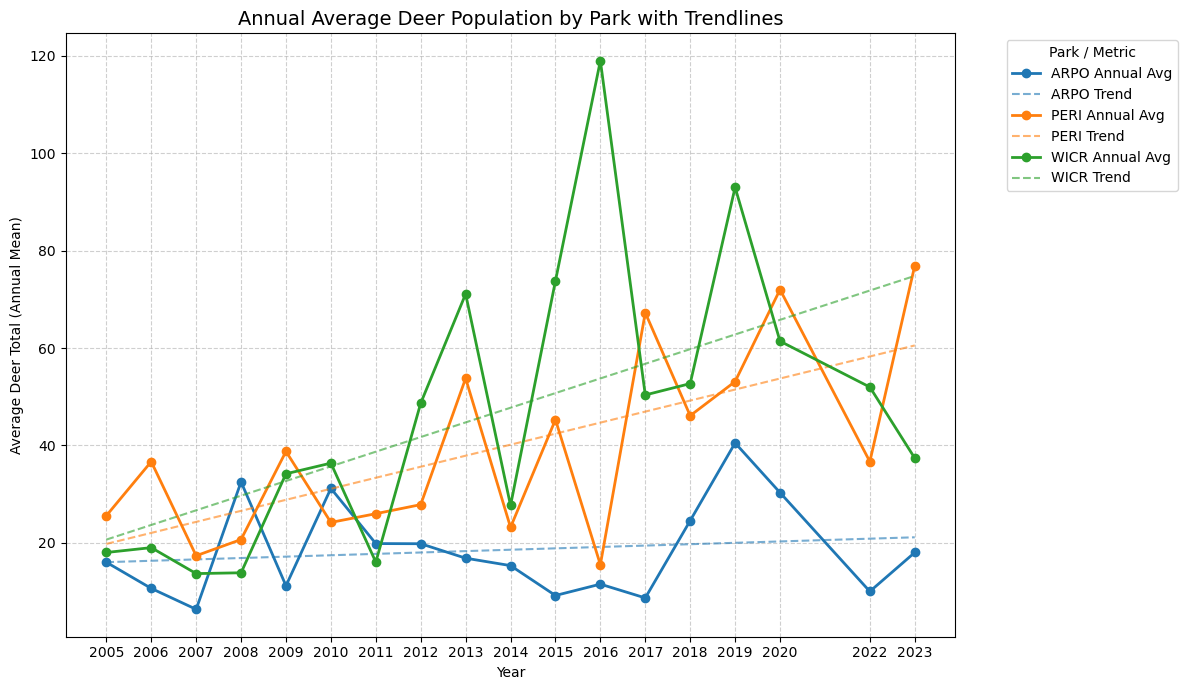

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure DeerDate is datetime
df['DeerDate'] = pd.to_datetime(df['DeerDate'], errors='coerce')
df['Year'] = df['DeerDate'].dt.year
df['Month'] = df['DeerDate'].dt.month

# --- Step 3: Assign a consistent color to each park ---
parks = sorted(annual_avg['ParkCode'].unique())
colors = plt.cm.tab10.colors  # up to 10 distinct colors
color_map = {park: colors[i % len(colors)] for i, park in enumerate(parks)}

# --- Step 4: Plot annual averages and trendlines ---
plt.figure(figsize=(12, 7))

for park, park_df in annual_avg.groupby('ParkCode'):
    park_df = park_df.sort_values('Year')
    color = color_map[park]

    # Plot annual averages (solid line)
    plt.plot(
        park_df['Year'],
        park_df['DeerTotal'],
        marker='o',
        color=color,
        linewidth=2,
        label=f'{park} Annual Avg'
    )

    # Plot trendline (dashed line, same color, slightly lighter)
    if len(park_df) > 1:
        z = np.polyfit(park_df['Year'], park_df['DeerTotal'], 1)
        p = np.poly1d(z)
        plt.plot(
            park_df['Year'],
            p(park_df['Year']),
            linestyle='--',
            color=color,
            alpha=0.6,  # lighter for trendline
            linewidth=1.5,
            label=f'{park} Trend'
        )

# --- Chart formatting ---
plt.title('Annual Average Deer Population by Park with Trendlines', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Deer Total (Annual Mean)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(sorted(annual_avg['Year'].unique().astype(int)))
plt.legend(title='Park / Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


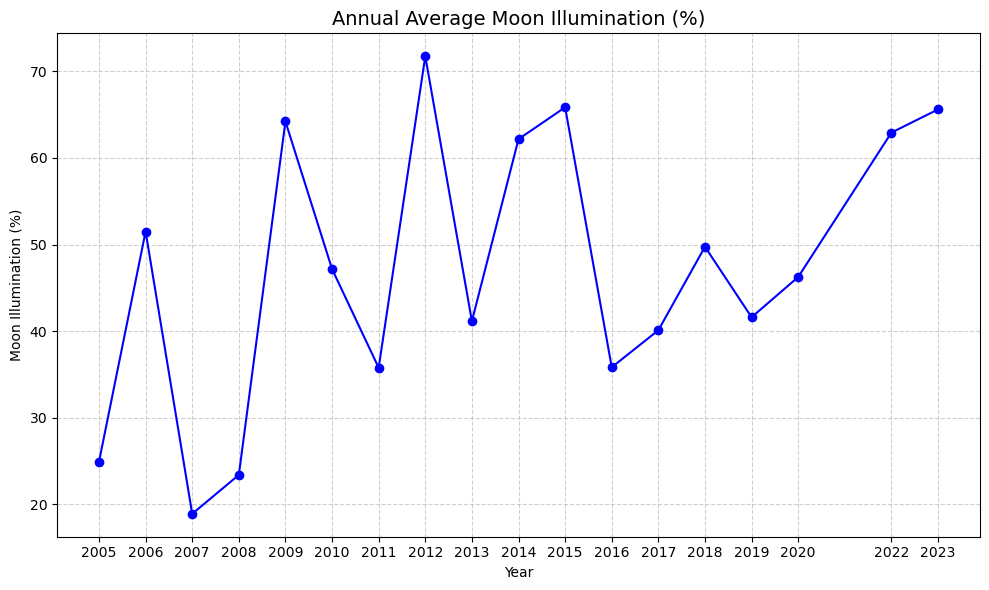

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df['DeerDate'] = pd.to_datetime(df['DeerDate'], errors='coerce')
df['Year'] = df['DeerDate'].dt.year
df['Month'] = df['DeerDate'].dt.month

# Step 1: Compute monthly averages of MoonIlluminationInPercentage
monthly_avg = (
    df.groupby(['Year', 'Month'], as_index=False)['MoonIlluminationInPercent']
    .mean()
)

# Step 2: Compute annual averages from monthly averages
annual_avg = (
    monthly_avg.groupby('Year', as_index=False)['MoonIlluminationInPercent']
    .mean()
)

# Step 3: Plot annual averages
plt.figure(figsize=(10, 6))
plt.plot(
    annual_avg['Year'],
    annual_avg['MoonIlluminationInPercent'],
    marker='o',
    linestyle='-',
    color='blue'
)

plt.title('Annual Average Moon Illumination (%)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Moon Illumination (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(annual_avg['Year'].astype(int))
plt.tight_layout()
plt.show()

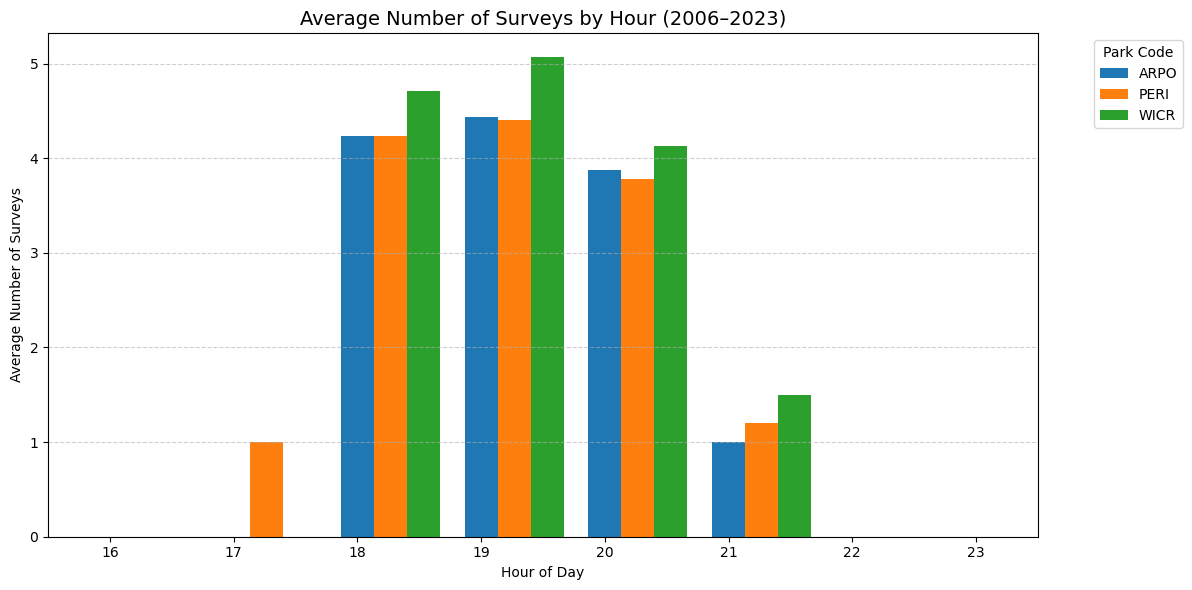

In [33]:
df['DeerDate'] = pd.to_datetime(df['DeerDate'], errors='coerce')
df['Year'] = df['DeerDate'].dt.year
df['StartTime'] = pd.to_datetime(df['StartTime'], format='%H:%M:%S', errors='coerce')
df['Hour'] = df['StartTime'].dt.hour

# Filter for 2006–2023
df_filtered = df[(df['Year'] >= 2006) & (df['Year'] <= 2023)]

# Step 1: Count surveys per hour per location per year
hourly_counts = (
    df_filtered.groupby(['ParkCode', 'Year', 'Hour'], as_index=False)
    .size()  # counts surveys
    .rename(columns={'size': 'SurveyCount'})
)

# Step 2: Compute the average per hour across all years (2006–2023)
hourly_avg = (
    hourly_counts.groupby(['ParkCode', 'Hour'], as_index=False)['SurveyCount']
    .mean()
)

# Step 3: Plot bar chart
plt.figure(figsize=(12, 6))

parks = hourly_avg['ParkCode'].unique()
colors = plt.cm.tab10.colors  # color map for up to 10 parks
color_map = {park: colors[i % len(colors)] for i, park in enumerate(parks)}

bar_width = 0.8 / len(parks)  # width for grouped bars

# Plot grouped bars
for i, park in enumerate(parks):
    park_df = hourly_avg[hourly_avg['ParkCode'] == park].sort_values('Hour')
    plt.bar(
        park_df['Hour'] + i * bar_width,  # shift bars for each park
        park_df['SurveyCount'],
        width=bar_width,
        color=color_map[park],
        label=park
    )

plt.title('Average Number of Surveys by Hour (2006–2023)', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Surveys')
hours_to_show = range(16, 24)  # 16 to 23

plt.xticks(hours_to_show, [str(h) for h in hours_to_show])
plt.xlim(15.5, 23.5)  # set limits so bars fit nicely
plt.legend(title='Park Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
